### Instagram Profile Data Extraction


In [12]:
# Install Required Libraries
! pip install instaloader matplotlib numpy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Lavan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
# Import Required Libraries
import instaloader
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from datetime import datetime

# Load Instagram Session Using Session ID
def load_instagram_session(session_id):
    """
    Load Instagram session using a session ID provided by the user.
    """
    try:
        loader = instaloader.Instaloader()
        # Set the session ID directly in the request context
        loader.context._session.cookies.set("sessionid", session_id)
        return loader
    except Exception as e:
        print(f"Error loading session: {e}")
        return None


In [14]:
def fetch_profile_data(username, loader):
    """
    Fetch and display basic Instagram profile details.
    """
    try:
        profile = instaloader.Profile.from_username(loader.context, username)
        print(f"Profile Name: {profile.full_name}")
        print(f"Bio: {profile.biography}")
        print(f"Followers: {profile.followers}")
        print(f"Following: {profile.followees}")
        return profile
    except Exception as e:
        print(f"Error fetching profile data: {e}")
        return None


In [15]:
def calculate_engagement_rate(likes, comments, followers):
    """
    Calculate engagement rate based on likes, comments, and followers.
    """
    try:
        total_engagement = sum(likes) + sum(comments)
        engagement_rate = (total_engagement / (followers * len(likes))) * 100
        return engagement_rate
    except ZeroDivisionError:
        return 0

def analyze_engagement_rate(profile):
    """
    Analyze the engagement rate of an Instagram profile based on recent posts.
    """
    try:
        followers = profile.followers
        likes, comments = [], []
        for post in profile.get_posts():
            likes.append(post.likes)
            comments.append(post.comments)
            if len(likes) >= 10:  # Limit to recent 10 posts
                break
        engagement_rate = calculate_engagement_rate(likes, comments, followers)
        print(f"Engagement Rate: {engagement_rate:.2f}%")
        return engagement_rate
    except Exception as e:
        print(f"Error calculating engagement rate: {e}")
        return None


In [16]:
# Define Hashtag Categories
HASHTAG_CATEGORIES = {
    "fashion": ["fashion", "style", "ootd", "trend", "vintage", "designer"],
    "beauty": ["beauty", "makeup", "skincare", "cosmetics", "beautytips"],
    "fitness": ["fitness", "workout", "health", "gym", "exercise"],
    "travel": ["travel", "wanderlust", "adventure", "vacation", "destination"],
    "food": ["food", "foodie", "yum", "recipe", "cooking"],
}

def categorize_influencer_by_hashtags(profile):
    """
    Categorize an influencer based on the hashtags in their posts.
    """
    try:
        hashtags = []
        for post in profile.get_posts():
            hashtags.extend(post.caption_hashtags)
            if len(hashtags) >= 50:  # Limit to 50 posts
                break

        hashtag_counter = Counter(hashtags)
        category_count = {category: 0 for category in HASHTAG_CATEGORIES}

        for hashtag, count in hashtag_counter.items():
            for category, keywords in HASHTAG_CATEGORIES.items():
                if hashtag in keywords:
                    category_count[category] += count

        influencer_type = max(category_count, key=category_count.get)
        print(f"Categorized as a '{influencer_type}' influencer.")
        plot_hashtag_frequency(hashtag_counter)
    except Exception as e:
        print(f"Error during categorization: {e}")

def plot_hashtag_frequency(hashtag_counter):
    """
    Plot the frequency of top hashtags.
    """
    common_hashtags = hashtag_counter.most_common(10)
    hashtags, counts = zip(*common_hashtags)
    plt.figure(figsize=(10, 6))
    plt.barh(hashtags, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title('Top 10 Most Frequent Hashtags')
    plt.gca().invert_yaxis()
    plt.show()


In [17]:
def estimate_earnings(followers, engagement_rate):
    """
    Estimate earnings per post based on followers and engagement rate.
    """
    rate_per_1000 = 0.10  # $0.10 per 1,000 followers
    estimated_earnings = (followers * engagement_rate) / 1000 * rate_per_1000
    print(f"Estimated Earnings: ${estimated_earnings:.2f} per post")
    return estimated_earnings


Profile Name: Shraddha Singh
Bio: Engineer & Certified SKINcare Consultant
✩ Life & Style with sidekicks @kikiandaani 
✩ YouTube 2.7M+ | Tiktok 700K+ 
✩ contact@shrads.com
Followers: 1971054
Following: 826

--- Engagement Rate Analysis ---
Engagement Rate: 1.69%

--- Hashtag Categorization ---
Categorized as a 'fashion' influencer.


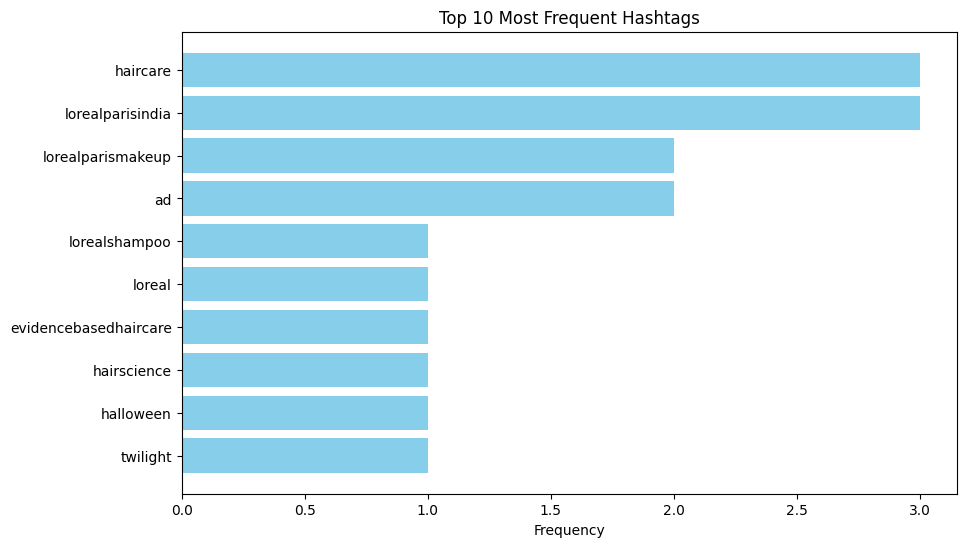


--- Earnings Estimation ---
Estimated Earnings: $333.85 per post


In [18]:
# Main Function to Analyze an Instagram Profile
def instagram_analysis():
    """
    Analyze an Instagram profile for engagement rate, hashtag categorization, 
    and estimated earnings.
    """
    session_id = input("Enter your Instagram session ID: ")
    username = input("Enter the Instagram username to analyze: ")
    
    loader = load_instagram_session(session_id)
    if not loader:
        return
    
    profile = fetch_profile_data(username, loader)
    if not profile:
        return
    
    print("\n--- Engagement Rate Analysis ---")
    engagement_rate = analyze_engagement_rate(profile)
    
    print("\n--- Hashtag Categorization ---")
    categorize_influencer_by_hashtags(profile)
    
    print("\n--- Earnings Estimation ---")
    estimate_earnings(profile.followers, engagement_rate)

# Run the Analysis
instagram_analysis()
